In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv("Q1_data.csv")
df.head()

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


In [5]:
df.describe()

,Unnamed: 0,open,close,high,low,market_cap,volume
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1.456000e+03
mean,727.500000,6409.803298,6413.959488,6511.671925,6310.950717,1.935885e+11,1.641040e+10
std,420.455309,10308.820707,10315.745017,10469.614104,10154.698361,1.708323e+11,1.699314e+10
min,0.000000,0.997814,0.997835,0.998569,0.981525,3.240715e+10,2.609959e+08
25%,363.750000,158.186886,158.231137,159.163097,153.550839,6.316777e+10,2.451769e+09
50%,727.500000,727.263336,727.288071,765.555654,715.152641,1.092437e+11,1.204046e+10
75%,1091.250000,5535.576237,5536.825389,5666.345777,5457.385796,2.661834e+11,2.449331e+10
max,1455.000000,31474.721364,31476.049385,31814.514812,30659.355893,6.115354e+11,1.627349e+11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1456 non-null   int64  
 1   symbol      1456 non-null   object 
 2   name        1456 non-null   object 
 3   time_stamp  1456 non-null   object 
 4   time_high   1456 non-null   object 
 5   time_low    1456 non-null   object 
 6   open        1456 non-null   float64
 7   close       1456 non-null   float64
 8   high        1456 non-null   float64
 9   low         1456 non-null   float64
 10  market_cap  1456 non-null   float64
 11  volume      1456 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 136.6+ KB


In [7]:
df['symbol'].value_counts()

BTC     364
BNB     364
ETH     364
USDT    364
Name: symbol, dtype: int64

1456


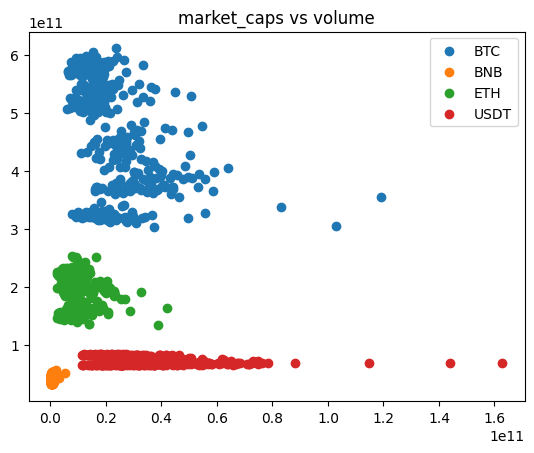

In [11]:
print(len(df['market_cap']))
sym = df["symbol"].unique()
for i in sym :
  plt.scatter( df[df['symbol'] == i ]['volume'], df[df['symbol'] == i ]['market_cap'] , label = i)
plt.title("market_caps vs volume")
plt.legend()
plt.show()

In [19]:
gg = pd.concat([df['volume'],df['market_cap']] , axis = 1 )

            volume    market_cap
0     1.514001e+10  5.308901e+11
1     9.999172e+09  5.188737e+11
2     2.253658e+10  4.194214e+11
3     3.125210e+10  4.715777e+11
4     1.619224e+10  3.657224e+11
...            ...           ...
1451  5.351085e+10  3.955964e+11
1452  2.806274e+08  3.913335e+10
1453  9.134015e+09  2.512149e+11
1454  1.041675e+10  1.603645e+11
1455  1.427639e+10  8.315792e+10

[1456 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 1 ... 0 0 4]


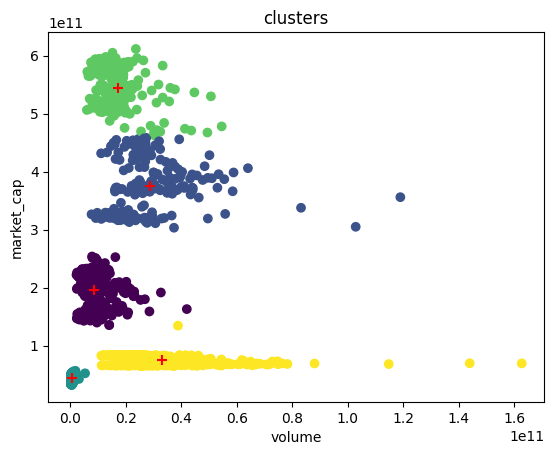

In [32]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
k_means.fit( gg )
centers = k_means.cluster_centers_
labels = k_means.labels_
print(labels)
plt.scatter(df['volume'] , df['market_cap'] , c = labels )
plt.scatter(centers[:,0] , centers[:,1], marker = "+" , s = 50 , color = 'red')
plt.xlabel("volume")
plt.ylabel("market_cap")
plt.title("clusters")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

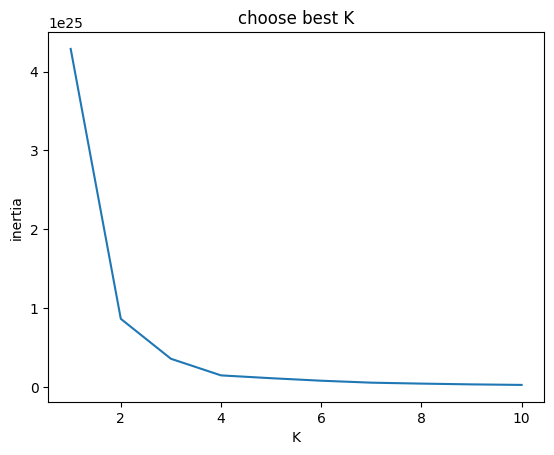

In [35]:
iners = []
for k in range(1,11) :
  k_means = KMeans(n_clusters=k)
  k_means.fit(gg)
  iners.append(k_means.inertia_)
plt.plot([i for i in range(1,11)], iners )
plt.title("choose best K")
plt.xlabel("K")
plt.ylabel("inertia")